In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import japanize_matplotlib       # 日本語化matplotlib
import seaborn as sns
sns.set(font="IPAexGothic")      # 日本語フォント設定

In [10]:
# data
df = pd.read_excel('../data/230915_AI用qPCRデータ.xlsx', header=0, index_col=0)
df

,glk,agp,yihX,pgm,ptsG,malx,crr,galM,yihR,yeaD,...,tpiA,gapA,pgk,gpmA,ytjc,gpmM,eno,pykF,pykA,ppsA
gene,,,,,,,,,,,,,,,,,,,,,
1,0.000004,2.982088e-05,0.000004,1.512045e-05,0.000015,9.403729e-07,0.000122,0.000015,4.792578e-07,0.000007,...,0.000008,0.000121,1.193258e-07,0.000119,0.000004,0.000008,0.000015,0.000030,0.000015,0.000030
2,0.000008,3.062644e-05,0.000016,2.940716e-08,0.000015,3.847846e-06,0.000124,0.000015,3.848767e-06,0.000015,...,0.000015,0.000123,2.377373e-07,0.000123,0.000008,0.000016,0.000031,0.000061,0.000031,0.000061
3,0.000008,7.608227e-06,0.000016,1.396326e-08,0.000031,9.615077e-07,0.000245,0.000015,4.864569e-07,0.000031,...,0.000015,0.000122,9.666787e-07,0.000122,0.000008,0.000016,0.000062,0.000062,0.000031,0.000062
4,0.000004,1.513944e-05,0.000015,1.225795e-07,0.000015,4.807837e-07,0.000124,0.000015,1.207673e-07,0.000008,...,0.000015,0.000061,2.410427e-07,0.000061,0.000004,0.000008,0.000031,0.000062,0.000031,0.000062
5,0.000008,4.768491e-07,0.000031,6.105349e-08,0.000031,9.593193e-07,0.000124,0.000015,2.428970e-07,0.000016,...,0.000016,0.000124,4.795912e-07,0.000124,0.000008,0.000008,0.000031,0.000062,0.000031,0.000062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.000031,6.311580e-05,0.000032,1.565811e-05,0.000065,3.920432e-06,0.000251,0.000031,1.944530e-06,0.000016,...,0.000016,0.000125,1.249595e-04,0.000125,0.000016,0.000008,0.000124,0.000125,0.000031,0.000064
138,0.000015,6.121521e-05,0.000062,1.545189e-05,0.000063,1.916767e-06,0.000245,0.000008,1.939770e-06,0.000015,...,0.000015,0.000122,1.225930e-04,0.000122,0.000008,0.000008,0.000245,0.000122,0.000061,0.000030
139,0.000031,6.155085e-05,0.000031,1.557439e-05,0.000062,1.924199e-06,0.000245,0.000015,4.867235e-07,0.000008,...,0.000016,0.000123,1.236311e-04,0.000123,0.000016,0.000008,0.000062,0.000123,0.000062,0.000062


In [19]:
print('max: ', df['glk'].max())
print('min: ', df['glk'].min())

max:  0.000492139333377735
min:  3.7129825850910744e-06


(array([[140.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [140.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [140.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [141.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [140.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [140.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [139.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.],
        [141.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [140.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [139.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [139.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.],
        [141.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [141.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [139.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [141.,   0.,

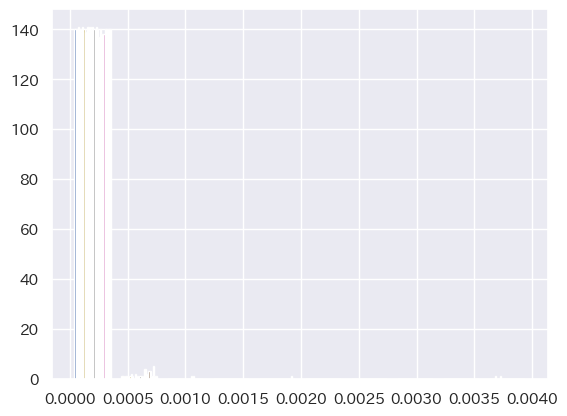

In [24]:
# データの描画
plt.hist(df)